<a href="https://colab.research.google.com/github/hap6v6/ML_study/blob/main/%EC%B6%94%EC%B2%9C%20%EC%8B%9C%EC%8A%A4%ED%85%9C%20%EC%9E%85%EB%AC%B8%ED%8E%B8/5_content_based_recommendation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content-Based Recommendation 2

In [161]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [162]:
ratings = pd.read_pickle('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/ratings_updated.p')
genres = pd.read_pickle('/content/drive/MyDrive/추천 시스템 입문(inflearn)/data/ml-latest-small/genres.p')

# User profile

## Sample user 414

In [163]:
# 414번 유저를 샘플 유저로 사용: 데이터 개수가 가장 많음
user414 = ratings[ratings['userId'] == 414]
user414.sample()

,userId,movieId,rating,timestamp
63368,414,3259,4.000000,2000-06-20 15:17:53


In [164]:
len(user414)
# 2698개의 영화를 봄

2698

In [165]:
# 유저 데이터에 장르 데이터 붙여줌
user414 = user414.merge(genres, left_on='movieId', right_index=True)
user414.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
63125,414,2411,3.000000,2000-06-20 15:52:56,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train Test Split
## 샘플 유저의 평점을 학습 데이터와 평가 데이터로 나누기

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
# user 414의 장르 정보와 rating 정보 따로 나눔
# X: 장르 정보, y: 해당 평점 정보
X_train, X_test, y_train, y_test = train_test_split(user414[genres.columns], 
                                                    user414['rating'], 
                                                    random_state=42, test_size=.1)

In [168]:
# feature, X: y를 예측하기 위해 필요한 정보들
# label, y: 정답
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2428, 20)
(2428,)
(270, 20)
(270,)


In [169]:
X_train.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
62968,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 샘플 유저의 프로필 만들기

## Linear Regression

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
# 모델 만들기
reg = LinearRegression()

In [172]:
# 모델 훈련
reg.fit(X_train, y_train)

LinearRegression()

In [173]:
# coefficient: 계수
reg.coef_

array([ 1.04932187, -0.16519465,  0.12503892,  0.66646026, -0.29618416,
       -0.06757262,  0.1753061 ,  0.43261644,  0.31547858,  0.05636728,
        0.29277987, -0.1206128 ,  0.35832908,  0.03551429,  0.25847584,
       -0.01912917,  0.1634995 , -0.13939399,  0.43835199,  0.29161535])

In [174]:
# intercept: 절편
# 기본 정수. 모든 장르 데이터가 없는 경우
reg.intercept_

3.200678127757581

In [175]:
# 아무런 장르 정보가 없는 영화에 대해서 예측 평점
# baseline score + (no genre listed) 변수의 coefficient
reg.intercept_ + reg.coef_[0]

4.2500000000000036

In [176]:
# Action 장르의 영화 예상 평점
# baseline score + Action 장르에 대한 coefficient
reg.intercept_ + reg.coef_[1]

3.035483479187076

In [177]:
# Action, Adventure 장르의 영화 예상 평점
# baseline score + Action 장르에 대한 coefficient + Adventure 장르에 대한 coefficient
reg.intercept_ + reg.coef_[1] + reg.coef_[2]

3.16052239519615

In [178]:
list(zip(X_train.columns, reg.coef_))

[('(no genres listed)', 1.0493218722424231),
 ('Action', -0.16519464857050492),
 ('Adventure', 0.1250389160090738),
 ('Animation', 0.6664602615156161),
 ('Children', -0.29618416468814773),
 ('Comedy', -0.06757261930358603),
 ('Crime', 0.17530609839293299),
 ('Documentary', 0.43261644111066383),
 ('Drama', 0.31547857708591487),
 ('Fantasy', 0.05636727626646813),
 ('Film-Noir', 0.29277987382219783),
 ('Horror', -0.12061279616418584),
 ('IMAX', 0.35832907660236973),
 ('Musical', 0.035514285435159554),
 ('Mystery', 0.2584758423706581),
 ('Romance', -0.019129170010524225),
 ('Sci-Fi', 0.1634994999246448),
 ('Thriller', -0.13939399479870954),
 ('War', 0.4383519944116418),
 ('Western', 0.29161535403606054)]

## 시각화

In [179]:
%matplotlib inline

<Axes: >

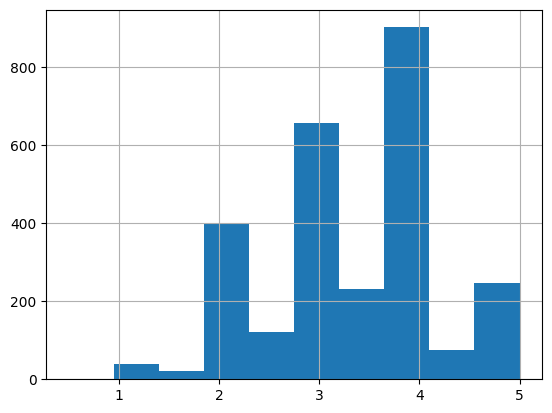

In [180]:
user414['rating'].hist()

<Axes: >

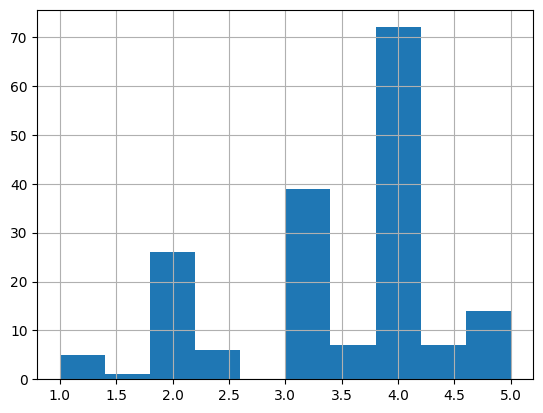

In [181]:
# 414번 유저가 가장 좋아하지 않는 (계수가 작은) Adventure 장르의 히스토그램
user414.loc[user414['Children'] == 1, 'rating'].hist()
# 1점, 2점이 비교적 많다

<Axes: >

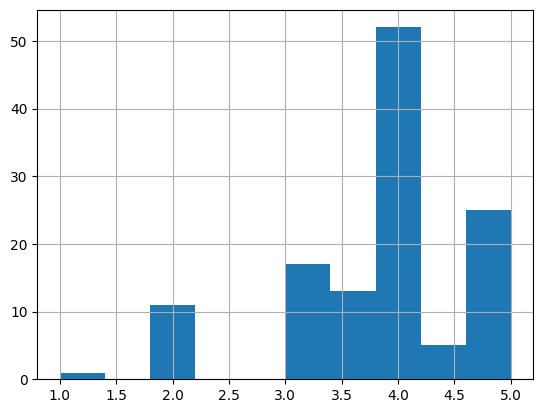

In [182]:
# 414번 유저가 가장 좋아하는 (계수가 큰) War 장르의 히스토그램
user414.loc[user414['War'] == 1, 'rating'].hist()
# 4, 5점이 많다

In [183]:
# 예측하기 (X_test 값으로 예측 진행)
predict = reg.predict(X_test)
# predict

In [184]:
# 모델 평가
from sklearn.metrics import mean_squared_error

In [185]:
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
rmse
# 성능이 굉장히 좋아졌다 (간단한 추천, CB v1보다도)
# 다만 전체적으로 확장했을 때에 성능이 약간 떨어진다

0.8764429330252587

# 전체 유저의 프로필 만들기

In [186]:
# ratings = ratings + genres 정보
ratings = ratings.merge(genres, left_on='movieId', right_index=True)
ratings.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
10833,68,2987,2.500000,2006-09-17 22:26:34,0,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [187]:
train, test = train_test_split(ratings, random_state=42, test_size=.1)

In [188]:
# user profile 만들기 (유저의 평점 정보)
# 각 유저마다 유저 프로필 만들고, X, y 나누고, 모델 학습하여 regression 절편, 계수 저장
user_profile_list = [] # 전체 유저 프로필 리스트

for userId in train['userId'].unique():
  user = train[train['userId'] == userId]
  X_train = user[genres.columns] # feature, X: rating을 예측하는데 도움이 되는 정보. 장르 정보
  y_train = user['rating'] # label, y: 정답 columns. 최종적으로 영화가 몇 점을 받았는지
  
  # 모델 학습
  reg = LinearRegression()
  reg.fit(X_train, y_train)

  # * : 리스트를 flatten하게 만들어주는 파이썬의 기능
  user_profile_list.append([reg.intercept_, *reg.coef_])

In [189]:
# 보기 쉽게끔 list -> 표
user_profile= pd.DataFrame(user_profile_list,
                           index=train['userId'].unique(), 
                           columns=['intercept', *genres.columns])

In [190]:
# 유저 프로필의 값 실수형 형태로 포맷
pd.set_option('float_format', '{:f}'.format)

In [191]:
user_profile
# 37번 유저: intercept 4.5-> 평균적으로 점수 높게 주는 사람. Romance 장르는 좋아하지 않고 IMAX 장르는 좋아한다

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
249,3.693115,0.000000,0.027411,0.027242,0.412653,-0.314130,-0.209777,0.189618,0.107383,0.251325,...,0.669763,-0.256916,-0.012565,0.144540,0.138326,0.001223,0.125803,-0.212086,-0.012097,0.355897
354,3.828023,0.000000,0.029733,-0.282522,-0.496069,0.273568,-0.310819,0.305351,0.377534,-0.100294,...,0.923666,-0.012373,-0.839618,-0.086879,0.133467,0.322991,0.101596,-0.070762,0.050920,-0.097735
339,3.904740,0.000000,-0.366817,0.072025,0.978452,-0.667841,-0.085153,0.315882,0.182522,0.226018,...,-0.016215,0.041993,-0.468748,-0.953067,0.086651,0.225394,0.124264,0.177113,0.248110,0.307574
448,2.572435,-1.322435,-0.169011,0.276746,0.444943,-0.057458,0.231763,0.130456,1.284327,0.284642,...,0.835523,-0.538456,-0.125718,0.445639,0.040435,-0.136866,-0.050382,0.049274,0.334096,0.678348
610,3.625384,0.000000,-0.153395,0.144457,0.324515,-0.321501,0.045694,0.160650,0.565478,0.286862,...,0.407013,-0.080522,0.020032,0.198447,0.062292,-0.083236,0.103000,-0.146788,0.029765,0.092105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,3.820713,0.000000,-0.644766,1.410913,0.059020,-1.115813,0.824053,-0.051782,0.000000,-0.428731,...,0.000000,0.303452,0.000000,-0.047884,0.375835,-0.178174,-0.500000,-0.124165,-0.802895,0.000000
37,4.577049,0.000000,-0.219672,-0.560656,0.065574,-0.360656,0.504918,-0.449180,0.000000,-0.396721,...,0.000000,0.750820,1.380328,-0.360656,0.000000,-2.422951,0.104918,0.121311,0.000000,0.380328
547,3.662202,0.000000,-0.273810,-0.000000,0.000000,0.000000,1.084821,-0.159226,-0.331101,0.011905,...,0.241071,0.000000,0.000000,-0.331101,0.325893,1.205357,1.630952,-0.226190,-1.639881,0.000000
106,5.611746,0.000000,-0.121911,-1.171253,0.146282,-0.991482,0.104343,-0.076348,0.000000,-0.663918,...,-0.000000,-0.291227,0.051387,0.000000,-0.102279,-0.000000,-0.824231,-0.182688,0.000000,0.000000


In [192]:
# My user profile 확인해보기 
user_profile.loc[1000]

intercept             4.650000
(no genres listed)    0.000000
Action               -0.025000
Adventure            -0.350000
Animation            -0.325000
Children              0.000000
Comedy               -1.000000
Crime                 0.000000
Documentary           0.000000
Drama                 0.350000
Fantasy              -0.325000
Film-Noir             0.000000
Horror                0.000000
IMAX                  0.000000
Musical              -0.325000
Mystery               0.000000
Romance              -0.325000
Sci-Fi               -0.025000
Thriller              0.000000
War                   0.000000
Western               0.000000
Name: 1000, dtype: float64

# 전체 유저의 평점 예측과 모델 평가

In [193]:
# for문의 진행 과정 시각적으로 보여주는 패키지
from tqdm import tqdm_notebook

In [194]:
# LinearRegression의 predict 함수를 사용하지 않고, 직접 intercept와 장르 점수를 더해서 예측하는 방법
# test 행에는 특정 영화가 속하는 장르가 0, 1로 표현되어 있음
# user profile 행에서는 절편과 장르에 따른 계수가 저장되어 있음
# 특정 영화에 평점을 예측하려면 이 계산 필요: 절편 + 영화가 속하는 장르(1) * 장르에 따른 계수

predict = []

for idx, row in tqdm_notebook(test.iterrows()):
  user = row['userId'] # test row의 user
  intercept = user_profile.loc[user, 'intercept'] #해당 user의 user_profile에서 intercept
  genre_score = sum(user_profile.loc[user, genres.columns] * row[genres.columns]) #해당 movie의 장르에서 비롯되는 예상 평점
  expected_score = intercept + genre_score
  predict.append(expected_score)

0it [00:00, ?it/s]

In [195]:
test['predict'] = predict

In [196]:
# 모델 평가
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict']))
rmse

0.9738286664865335

# 오버피팅 (Overfitting)
## 문제는? 
왜 오히려 CB v1보다, v2 샘플 유저의 경우보다 rmse가 크게 나올까?<br>
- 각 유저별로 데이터 갯수가 동일하지 않음
- Overfitting 발생
  - 데이터 갯수가 작은 user에게 coefficient 계산이 정확하지 않음, 또는 train 데이터만 설명할 수 있음
  - train 데이터에 대해서는 정확하게 맞출 수 있지만, 새로운 데이터 (test 데이터)에 대한 예측은 사실상 신뢰하기 어렵다.


## 해결책은?
- (스스로 해보기) 빈도수가 낮은 장르 없애기
- (스스로 해보기) correlation이 높은 장르들을 합치기
  - 자주 같이 등장하는 장르를 합침으로써 장르의 가짓수 줄이기
- (스스로 해보기) 데이터가 적은 user에 대해서 전체 평균, user별 평균, content based 1번 방법론 사용 등 다른 방법을 섞어서 풀기 (앙상블)
- 정규화가 가능한 linear model 사용하기 (Ridge, Lasso 등)

# Lasso 모델 적용

In [197]:
from sklearn.linear_model import Lasso

In [198]:
model = Lasso()
model
# 중요한 옵션 alpha
# defalut aplha 1.0은 굉장히 큰 값이고, 일단 적절한 alpha의 값을 찾아 제공함
# 한 사람 한 사람 마다 최적의 alpha는 다를 수 있다. 

Lasso()

Lasso 모델 사용시 주의점
- 중요한 옵션인 alpha의 값: 제약 조건의 비중을 조절함
- defalut aplha 1.0은 굉장히 큰 값이고, 일단 수업에서는 적절한 alpha의 값을 미리 찾아 제공함
- 각 유저마다 최적의 alpha는 다를 수 있지만, 보편적인 alpha 값을 사용함
- 적정 alpha 값 관련한 추가 설명은 'Lasso 하이퍼파라미터 튜닝' 챕터에서.

In [199]:
# Lasso 모델을 기준으로 한 새로운 user profile 만들기
user_profile_list = [] # 전체 유저 프로필 리스트

for userId in train['userId'].unique():
  user = train[train['userId'] == userId]
  X_train = user[genres.columns] # feature, X
  y_train = user['rating'] # label, y
  
  # 모델 학습
  reg = Lasso(alpha=0.03)
  reg.fit(X_train, y_train)

  user_profile_list.append([reg.intercept_, *reg.coef_])

In [200]:
# 보기 쉽게끔 list -> 표
user_profile_lasso = pd.DataFrame(user_profile_list,
                           index=train['userId'].unique(), 
                           columns=['intercept', *genres.columns])
user_profile_lasso
# Linear Regression로 만든 유저 프로필과의 차이점
# : 계수가 0인 장르가 굉장히 많다. 장르 계수가 0-> 특정 유저의 영화 평점을 예측하는 것에 이 장르 정보가 중요하지 않다 (feature selection)
# 만약 계수가 0인 장르의 영화 평점을 예측하고자 한다면?
# intercept(절편) 값 사용하고, 추가로 장르에 대한 선호도 외에 배우, 감독, 시나리오 주제 등의 다른 feature 발굴해 사용

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
249,3.668491,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.047536,0.000000,0.000000,0.154998,...,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000
354,3.810307,0.000000,-0.000000,-0.215992,-0.000000,-0.000000,-0.110240,0.075165,0.000000,0.000000,...,0.000000,-0.000000,-0.171396,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000
339,4.033959,0.000000,-0.181899,-0.009566,0.000000,-0.000000,-0.000000,0.074328,0.000000,0.156590,...,0.000000,0.000000,-0.259780,-0.000000,0.000000,0.000000,-0.000000,0.075543,0.000000,0.000000
448,2.806142,-0.000000,-0.040494,0.000000,0.000000,0.000000,0.032694,0.000000,0.000000,0.085376,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.020309,-0.000000,0.000000,0.000000
610,3.640871,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.189742,...,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.041762,-0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,3.765437,0.000000,-0.395150,0.131851,0.000000,0.000000,0.359414,-0.000000,0.000000,-0.034477,...,0.000000,0.000000,0.000000,0.157549,0.000000,0.095510,-0.000000,-0.000000,0.000000,0.000000
37,4.617112,0.000000,-0.402123,-0.407970,-0.000000,-0.577408,0.045529,-0.057728,0.000000,-0.131501,...,0.000000,0.000000,0.352363,-0.000000,0.000000,-1.282549,0.000000,-0.000000,0.000000,-0.000000
547,3.784937,0.000000,-0.000000,0.000000,0.000000,0.000000,0.907006,-0.210510,-0.218332,0.000000,...,0.000000,0.000000,0.000000,-0.026648,0.000000,0.816675,0.902218,-0.000000,-1.423274,0.000000
106,5.018952,0.000000,-0.000000,-0.292840,-0.000000,-0.522699,0.000000,0.000000,0.000000,-0.127032,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.955841,-0.000000,0.000000,0.000000


In [201]:
# 평점 예측하기
predict = []

for idx, row in tqdm_notebook(test.iterrows()):
  user = row['userId'] # test row의 user
  intercept = user_profile_lasso.loc[user, 'intercept'] #해당 user의 user_profile_lasso의 intercept
  genre_score = sum(user_profile_lasso.loc[user, genres.columns] * row[genres.columns]) #해당 movie의 장르에서 비롯되는 예상 평점
  expected_score = intercept + genre_score
  predict.append(expected_score)

0it [00:00, ?it/s]

In [203]:
test['predict_lasso'] = predict

In [206]:
# 성능 평가하기
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict_lasso']))
rmse
# Linear Regression에 정규화를 하니 rmse가 약간 개선됨
# 오버피팅 된 부분을 Lasso 모델로 개선하였다

0.9198165941286558

# 내 데이터 뜯어보기
Linear Regression vs. with Regularization 비교